In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Machine learning Godunov took 0.35766124725341797
HLLC Godunov took 0.2386939525604248


Text(0.5, 1.0, 'Pressure Plot \nTime=0.2, Steps=65')

<Figure size 432x288 with 0 Axes>

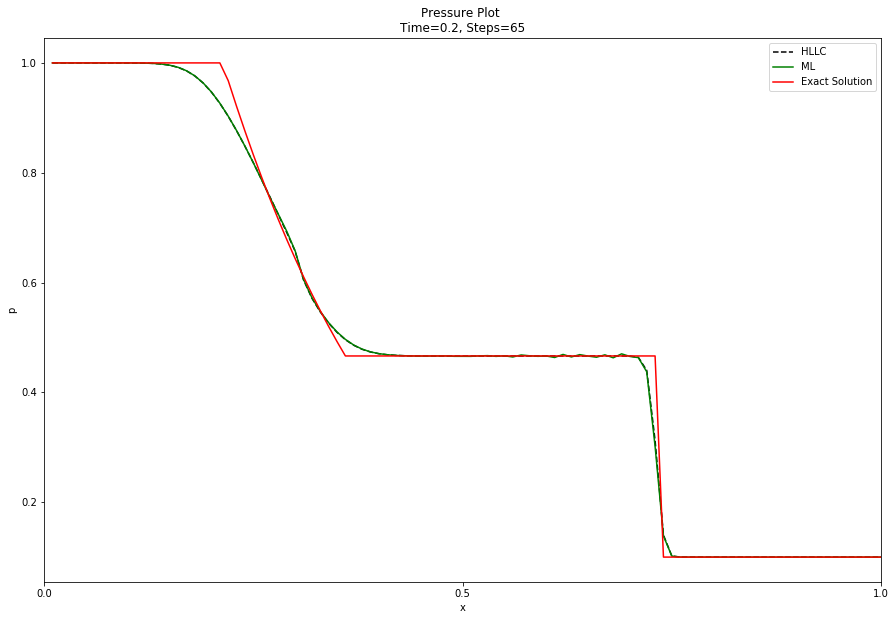

In [3]:
from MLpstargodunov import MLgodunov
from HLLCgodunov import HLLCgodunov
import initial_data as i
import numpy as np
import pylab as plt
import solve, time

#Time the process
start=time.time()
result = MLgodunov(np.array(i.initrhovals),np.array(i.inituvals),np.array(i.initpvals),i.gamma,i.T,i.dx)
end=time.time()-start
print("Machine learning Godunov took", end)

start = time.time()
result1 = HLLCgodunov(np.array(i.initrhovals),np.array(i.inituvals),np.array(i.initpvals),i.gamma,i.T,i.dx)
end=time.time()-start
print("HLLC Godunov took", end)
#Pressure
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(i.xvals,result1[2],'--k',
         label='HLLC')
plt.plot(i.xvals,result[2],'-g',
         label='ML')
yvals=[solve.solve(xi-i.x0,i.T,i.uL,i.uR,i.pL,i.pR,i.rhoL,i.rhoR,i.gamma,TOL=10**-6)[2] for xi in i.xvals]
plt.plot(i.xvals,yvals,'r',label='Exact Solution')
plt.legend()
plt.xlim((0,1))
plt.xlabel('x')
plt.ylabel('p')
plt.xticks((0,0.5,1))
plt.title('Pressure Plot ' +'\n' + 'Time='+str(i.T)+', Steps='+
          str(result[3]))

Text(0.5, 1.0, 'Velocity Plot \nTime=0.2, Steps=65')

<Figure size 432x288 with 0 Axes>

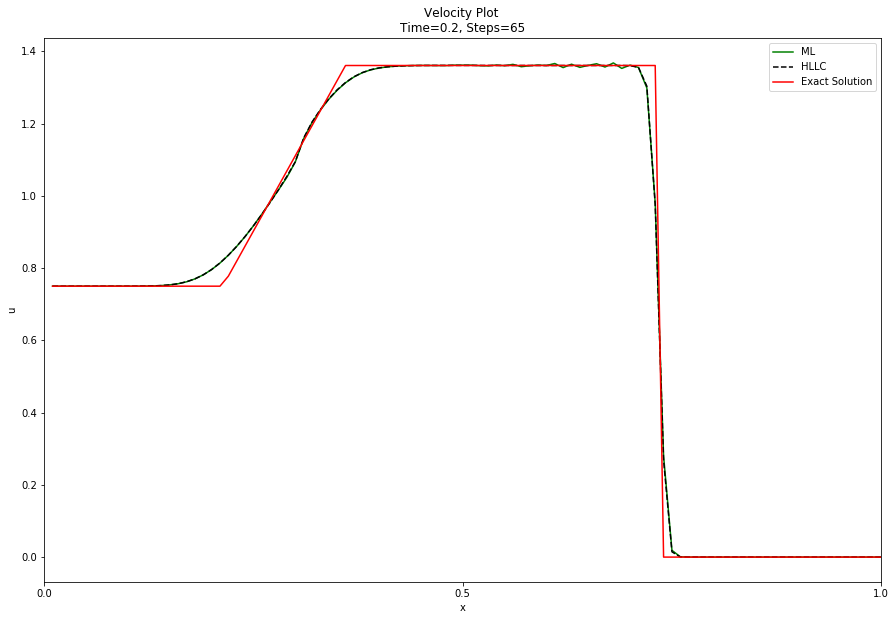

In [4]:
##Velocity
plt.figure()
plt.figure(figsize=(15,10))
plt.plot(i.xvals,result[0],'-g',
         label='ML')
plt.plot(i.xvals,result1[0],'--k',
         label='HLLC')
yvals=[solve.solve(xi-i.x0,i.T,i.uL,i.uR,i.pL,i.pR,i.rhoL,i.rhoR,i.gamma,TOL=10**-6)[0] for xi in i.xvals]
plt.plot(i.xvals,yvals,'r',label='Exact Solution')
plt.legend()
plt.xlim((0,1))
plt.xticks((0,0.5,1))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Velocity Plot ' +'\n' + 'Time='+str(i.T)+', Steps='+
          str(result[3]))

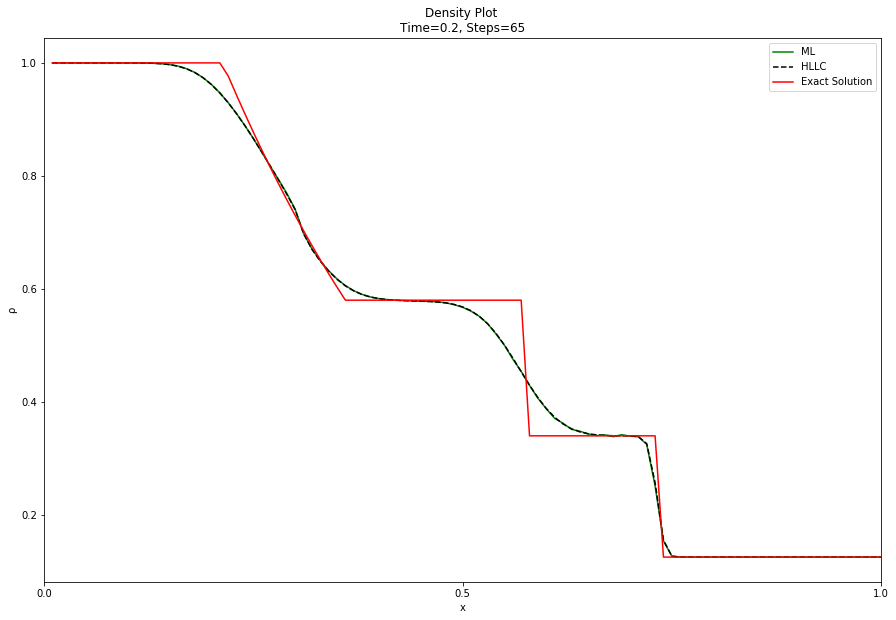

In [5]:
##Density
plt.figure(figsize=(15,10))
plt.plot(i.xvals,result[1],'-g',
         label='ML')
plt.plot(i.xvals,result1[1],'--k',
         label='HLLC')
yvals=[solve.solve(xi-i.x0,i.T,i.uL,i.uR,i.pL,i.pR,i.rhoL,i.rhoR,i.gamma,TOL=10**-6)[1] for xi in i.xvals]
plt.plot(i.xvals,yvals,'r',label='Exact Solution')
plt.legend()
plt.xlim((0,1))
plt.xticks((0,0.5,1))
plt.xlabel('x')
greek_letterz=[chr(code) for code in range(945,970)]
plt.ylabel(greek_letterz[16])
plt.title('Density Plot ' +'\n' + 'Time='+str(i.T)+', Steps='+
          str(result[3]))
plt.show()

Speed up might result from estimating the flux function as a whole rather than just the pressure pstar